# Kanji Analysis
Author: Addison Rogers


In [66]:
import pandas as pd

assignments_df = pd.read_csv('data/assignments.csv')
level_df = pd.read_csv('data/level_progressions.csv')
stats_df = pd.read_csv('data/review_statistics.csv')
reviews_df = pd.read_csv('data/reviews.csv')

Let's begin by looking at review data. I had an abortive start (followed by a reset) many years ago,
but I did not start using WaniKani again until 2019.

In [67]:
reviews_df.head()

,created_at,assignment_id,subject_id,spaced_repetition_system_id,starting_srs_stage,starting_srs_stage_name,ending_srs_stage,ending_srs_stage_name,incorrect_meaning_answers,incorrect_reading_answers,data_updated_at
0,2019-03-18T15:00:37.349552Z,73168697,6,1,1,Apprentice I,2,Apprentice II,0,0,2020-06-14T11:16:02.714916Z
1,2019-03-18T15:00:39.589527Z,73168706,18,1,1,Apprentice I,2,Apprentice II,0,0,2020-06-14T11:16:02.714916Z
2,2019-03-18T15:00:41.678417Z,73168701,12,1,1,Apprentice I,2,Apprentice II,0,0,2020-06-14T11:16:02.714916Z
3,2019-03-18T15:00:43.764762Z,73168700,9,1,1,Apprentice I,2,Apprentice II,0,0,2020-06-14T11:16:02.714916Z
4,2019-03-18T15:00:46.143028Z,73168692,1,1,1,Apprentice I,2,Apprentice II,0,0,2020-06-14T11:16:02.714916Z


Looking at the reviews table, which comes sorted by created_at, we can see that the first reviews
were created in March 2019. Reviews are per subject and assignment. We are given ids that we
can use to join with other tables, some descriptive strings, and number of incorrect meaning and
reading answers.

In [68]:
stats_df.head()

,created_at,subject_id,subject_type,meaning_correct,meaning_incorrect,meaning_max_streak,meaning_current_streak,reading_correct,reading_incorrect,reading_max_streak,reading_current_streak,percentage_correct,hidden,data_updated_at
0,2017-06-19T13:08:57.099843Z,8761,radical,8,0,8,8,8,0,8,8,100,False,2019-09-08T19:08:13.610706Z
1,2017-06-19T13:08:57.185915Z,8762,radical,8,0,8,8,8,0,8,8,100,False,2019-09-08T19:10:07.809130Z
2,2017-06-19T13:08:57.288680Z,8763,radical,11,1,7,7,11,0,11,11,96,False,2019-09-18T19:14:12.686138Z
3,2017-06-19T13:08:57.378301Z,1,radical,8,0,8,8,8,0,8,8,100,False,2019-09-07T09:31:31.371812Z
4,2017-06-19T13:08:57.478804Z,2,radical,8,0,8,8,8,0,8,8,100,False,2019-09-07T09:32:28.836790Z


The review statistics table, on the other hand, gives all data even before reset. Here we will
need to filter by the first date shown in the reviews table. To do that we will need to convert
timestamps in both tables to datetime.

In [69]:
reviews_df['created_at'] = pd.to_datetime(reviews_df['created_at'])
stats_df['created_at'] = pd.to_datetime(stats_df['created_at'])

In [70]:
stats_df = stats_df[(stats_df['created_at'] > '2019')]

Let's start by looking at the distribution of correct answers (as percentage correct) by subject type.

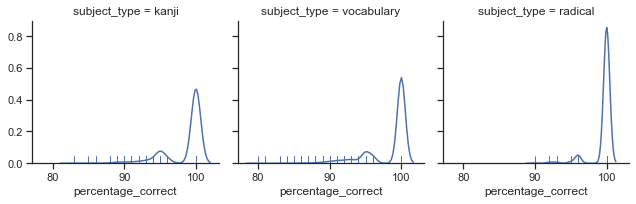

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='ticks')

g = sns.FacetGrid(stats_df, col = 'subject_type')
g.map(sns.distplot, 'percentage_correct', rug=True, hist=False)


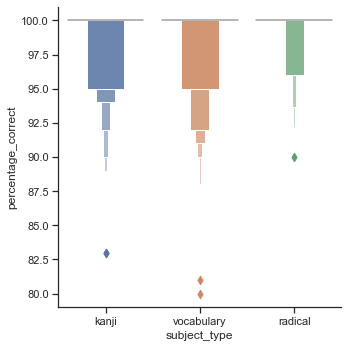

In [72]:
sns.catplot(x='subject_type', y='percentage_correct', kind='boxen',
            data=stats_df)

Some outliers are present, but it seems the majority of reviews are 90% or better. Not too bad if I say so myself!
What do reviews look like by the hour?

In [146]:
stats_by_hour = stats_df.copy()
stats_by_hour['hour'] = stats_by_hour['created_at'].dt.hour
stats_by_hour.groupby('hour').count()

,created_at,subject_id,subject_type,meaning_correct,meaning_incorrect,meaning_max_streak,meaning_current_streak,reading_correct,reading_incorrect,reading_max_streak,reading_current_streak,percentage_correct,hidden,data_updated_at
hour,,,,,,,,,,,,,,
0,12,12,12,12,12,12,12,12,12,12,12,12,12,12
7,10,10,10,10,10,10,10,10,10,10,10,10,10,10
8,511,511,511,511,511,511,511,511,511,511,511,511,511,511
9,2169,2169,2169,2169,2169,2169,2169,2169,2169,2169,2169,2169,2169,2169
10,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663
11,645,645,645,645,645,645,645,645,645,645,645,645,645,645
12,147,147,147,147,147,147,147,147,147,147,147,147,147,147
13,116,116,116,116,116,116,116,116,116,116,116,116,116,116
14,42,42,42,42,42,42,42,42,42,42,42,42,42,42


There are only 22 examples between midnight and 7, so let's drop those for the continuous line plot.

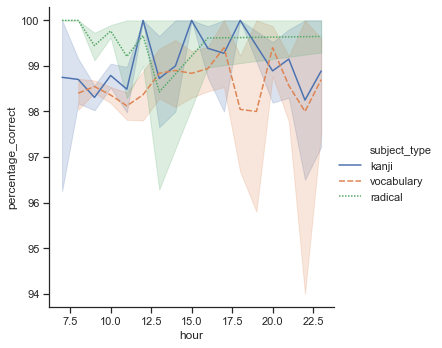

In [145]:
sel_hours = stats_by_hour['hour'] >= 7
ax = sns.relplot(x='hour', y='percentage_correct', kind='line',
            hue='subject_type', style='subject_type', data=stats_by_hour[sel_hours])

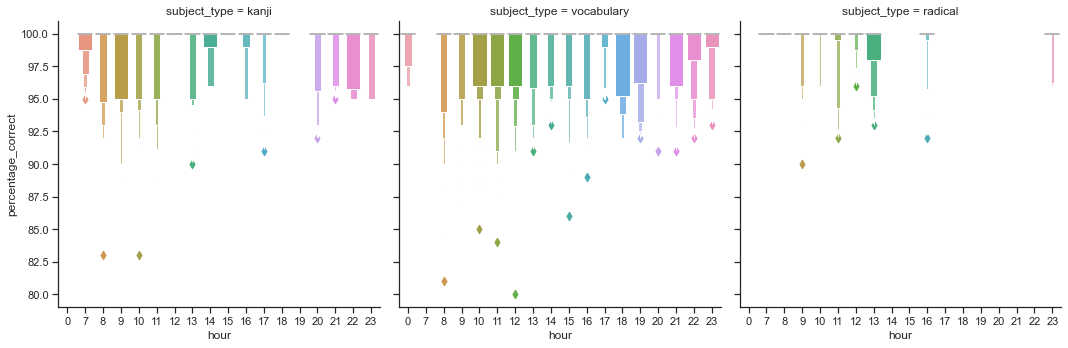

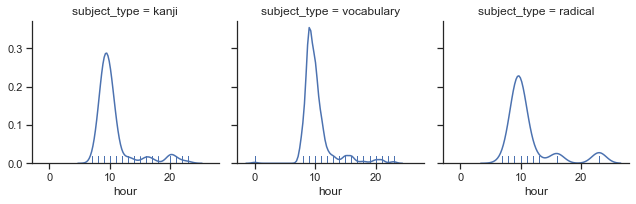

In [149]:
g = sns.catplot(x='hour', y='percentage_correct',
                col='subject_type',
                data=stats_by_hour, kind='boxen')

p = sns.FacetGrid(stats_by_hour, col = 'subject_type')
p.map(sns.distplot, 'hour', rug=True, hist=False)